<a href="https://colab.research.google.com/github/SolFreire/McCulloch-PittsNnWIrisProblem/blob/main/PerceptronSimplesIris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import seaborn as sns


In [3]:
def create_binary_dataset_explicit(X, y, target_class):
    y_bin = np.where(y == target_class, 1, 0)
    return X, y_bin


In [24]:
class Perceptronnb:
    def __init__(self, n_features, lr=0.01, epochs=50):
        self.lr = lr
        self.epochs = epochs
        self.weights = torch.randn(n_features, dtype=torch.float32)
        self.bias = torch.tensor(-1.0)

    def activation(self, x):
        return torch.where(x >= 0, 1, 0)

    def fit(self, X, y):
        X = torch.tensor(X, dtype=torch.float32)
        y = torch.tensor(y, dtype=torch.float32)
        errors = []
        for epoch in range(self.epochs):
            total_error = 0
            for i in range(X.shape[0]):
                z = torch.dot(X[i], self.weights) + self.bias
                y_pred = self.activation(z)
                error = y[i] - y_pred
                self.weights += self.lr * error * X[i]
                self.bias += self.lr * error
                total_error += abs(error.item())
            errors.append(total_error)

        return errors

    def predict(self, X):
        X = torch.tensor(X, dtype=torch.float32)
        z = torch.matmul(X, self.weights) + self.bias
        return self.activation(z).numpy()

In [25]:
class Perceptronpb:
    def __init__(self, n_features, lr=0.01, epochs=50):
        self.lr = lr
        self.epochs = epochs
        self.weights = torch.randn(n_features, dtype=torch.float32)
        self.bias = torch.tensor(1.0)

    def activation(self, x):
        return torch.where(x >= 0, 1, 0)

    def fit(self, X, y):
        X = torch.tensor(X, dtype=torch.float32)
        y = torch.tensor(y, dtype=torch.float32)
        errors = []
        for epoch in range(self.epochs):
            total_error = 0
            for i in range(X.shape[0]):
                z = torch.dot(X[i], self.weights) + self.bias
                y_pred = self.activation(z)
                error = y[i] - y_pred
                self.weights += self.lr * error * X[i]
                self.bias += self.lr * error
                total_error += abs(error.item())
            errors.append(total_error)

        return errors

    def predict(self, X):
        X = torch.tensor(X, dtype=torch.float32)
        z = torch.matmul(X, self.weights) + self.bias
        return self.activation(z).numpy()

In [39]:
iris = load_iris()
X = iris.data
y = iris.target
y_binary = np.where(y == 0, 1, 0)

scaler = StandardScaler()
X = scaler.fit_transform(X)

print(np.unique(y_binary, return_counts=True))

(array([0, 1]), array([100,  50]))


Realização 1: Acurácia = 1.0000
Realização 2: Acurácia = 1.0000
Realização 3: Acurácia = 1.0000
Realização 4: Acurácia = 0.9778
Realização 5: Acurácia = 1.0000
Realização 6: Acurácia = 1.0000
Realização 7: Acurácia = 1.0000
Realização 8: Acurácia = 1.0000
Realização 9: Acurácia = 0.9778
Realização 10: Acurácia = 0.9333
Realização 11: Acurácia = 0.9333
Realização 12: Acurácia = 0.9778
Realização 13: Acurácia = 1.0000
Realização 14: Acurácia = 1.0000
Realização 15: Acurácia = 1.0000
Realização 16: Acurácia = 1.0000
Realização 17: Acurácia = 0.9778
Realização 18: Acurácia = 0.9778
Realização 19: Acurácia = 1.0000
Realização 20: Acurácia = 0.9778

📊 Resultados gerais:
Acurácia média: 0.9867
Desvio padrão:  0.0204
Melhor realização: 1 (Acurácia = 1.0000)


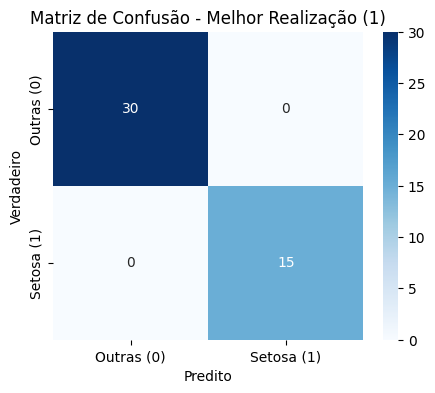

In [40]:
accuracies = []
conf_matrices = []

for run in range(20):
    X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.3, stratify=y, random_state=run)

    model = Perceptronnb(n_features=X.shape[1], lr=0.01, epochs=50)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    conf_matrices.append(confusion_matrix(y_test, y_pred))

    print(f"Realização {run+1}: Acurácia = {acc:.4f}")

mean_acc = np.mean(accuracies)
std_acc = np.std(accuracies)
best_run = np.argmax(accuracies)

print("\n📊 Resultados gerais:")
print(f"Acurácia média: {mean_acc:.4f}")
print(f"Desvio padrão:  {std_acc:.4f}")
print(f"Melhor realização: {best_run+1} (Acurácia = {accuracies[best_run]:.4f})")

best_conf = conf_matrices[best_run]

plt.figure(figsize=(5, 4))
sns.heatmap(best_conf, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Outras (0)', 'Setosa (1)'],
            yticklabels=['Outras (0)', 'Setosa (1)'])
plt.title(f"Matriz de Confusão - Melhor Realização ({best_run+1})")
plt.xlabel("Predito")
plt.ylabel("Verdadeiro")
plt.show()



Realização 1: Acurácia = 1.0000
Realização 2: Acurácia = 1.0000
Realização 3: Acurácia = 0.9556
Realização 4: Acurácia = 0.9778
Realização 5: Acurácia = 1.0000
Realização 6: Acurácia = 1.0000
Realização 7: Acurácia = 0.9778
Realização 8: Acurácia = 0.9778
Realização 9: Acurácia = 1.0000
Realização 10: Acurácia = 0.9778
Realização 11: Acurácia = 1.0000
Realização 12: Acurácia = 1.0000
Realização 13: Acurácia = 1.0000
Realização 14: Acurácia = 0.9333
Realização 15: Acurácia = 0.9778
Realização 16: Acurácia = 0.9556
Realização 17: Acurácia = 1.0000
Realização 18: Acurácia = 0.9778
Realização 19: Acurácia = 1.0000
Realização 20: Acurácia = 0.9778

📊 Resultados gerais:
Acurácia média: 0.9844
Desvio padrão:  0.0187
Melhor realização: 1 (Acurácia = 1.0000)


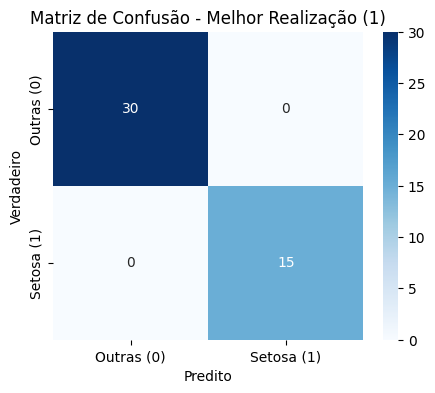

In [41]:
accuracies = []
conf_matrices = []

for run in range(20):
    X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.3, stratify=y, random_state=run)

    model = Perceptronpb(n_features=X.shape[1], lr=0.01, epochs=50)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    conf_matrices.append(confusion_matrix(y_test, y_pred))

    print(f"Realização {run+1}: Acurácia = {acc:.4f}")

mean_acc = np.mean(accuracies)
std_acc = np.std(accuracies)
best_run = np.argmax(accuracies)

print("\n📊 Resultados gerais:")
print(f"Acurácia média: {mean_acc:.4f}")
print(f"Desvio padrão:  {std_acc:.4f}")
print(f"Melhor realização: {best_run+1} (Acurácia = {accuracies[best_run]:.4f})")

best_conf = conf_matrices[best_run]

plt.figure(figsize=(5, 4))
sns.heatmap(best_conf, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Outras (0)', 'Setosa (1)'],
            yticklabels=['Outras (0)', 'Setosa (1)'])
plt.title(f"Matriz de Confusão - Melhor Realização ({best_run+1})")
plt.xlabel("Predito")
plt.ylabel("Verdadeiro")
plt.show()


In [42]:
y_binary_versicolor = np.where(y == 1, 1, 0)
print(np.unique(y_binary_versicolor, return_counts=True))

(array([0, 1]), array([100,  50]))


Realização 1: Acurácia = 0.6444
Realização 2: Acurácia = 0.6222
Realização 3: Acurácia = 0.7111
Realização 4: Acurácia = 0.6667
Realização 5: Acurácia = 0.8222
Realização 6: Acurácia = 0.8444
Realização 7: Acurácia = 0.5778
Realização 8: Acurácia = 0.6889
Realização 9: Acurácia = 0.6222
Realização 10: Acurácia = 0.6889
Realização 11: Acurácia = 0.6667
Realização 12: Acurácia = 0.7111
Realização 13: Acurácia = 0.6667
Realização 14: Acurácia = 0.7111
Realização 15: Acurácia = 0.6444
Realização 16: Acurácia = 0.4000
Realização 17: Acurácia = 0.4889
Realização 18: Acurácia = 0.4444
Realização 19: Acurácia = 0.7333
Realização 20: Acurácia = 0.6889

📊 Resultados gerais:
Acurácia média: 0.6522
Desvio padrão:  0.1069
Melhor realização: 6 (Acurácia = 0.8444)


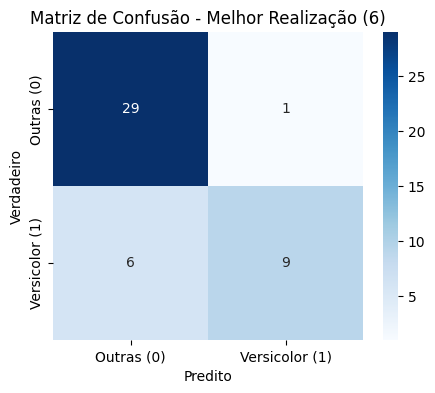

In [44]:
accuracies = []
conf_matrices = []

for run in range(20):
    X_train, X_test, y_train, y_test = train_test_split(X, y_binary_versicolor, test_size=0.3, stratify=y, random_state=run)

    model = Perceptronnb(n_features=X.shape[1], lr=0.01, epochs=50)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    conf_matrices.append(confusion_matrix(y_test, y_pred))

    print(f"Realização {run+1}: Acurácia = {acc:.4f}")

mean_acc = np.mean(accuracies)
std_acc = np.std(accuracies)
best_run = np.argmax(accuracies)

print("\n📊 Resultados gerais:")
print(f"Acurácia média: {mean_acc:.4f}")
print(f"Desvio padrão:  {std_acc:.4f}")
print(f"Melhor realização: {best_run+1} (Acurácia = {accuracies[best_run]:.4f})")

best_conf = conf_matrices[best_run]

plt.figure(figsize=(5, 4))
sns.heatmap(best_conf, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Outras (0)', 'Versicolor (1)'],
            yticklabels=['Outras (0)', 'Versicolor (1)'])
plt.title(f"Matriz de Confusão - Melhor Realização ({best_run+1})")
plt.xlabel("Predito")
plt.ylabel("Verdadeiro")
plt.show()



Realização 1: Acurácia = 0.7333
Realização 2: Acurácia = 0.5778
Realização 3: Acurácia = 0.8000
Realização 4: Acurácia = 0.6667
Realização 5: Acurácia = 0.7111
Realização 6: Acurácia = 0.6444
Realização 7: Acurácia = 0.5556
Realização 8: Acurácia = 0.6667
Realização 9: Acurácia = 0.5556
Realização 10: Acurácia = 0.6889
Realização 11: Acurácia = 0.6222
Realização 12: Acurácia = 0.7333
Realização 13: Acurácia = 0.6889
Realização 14: Acurácia = 0.6222
Realização 15: Acurácia = 0.7111
Realização 16: Acurácia = 0.6444
Realização 17: Acurácia = 0.4667
Realização 18: Acurácia = 0.6000
Realização 19: Acurácia = 0.7333
Realização 20: Acurácia = 0.7556

📊 Resultados gerais:
Acurácia média: 0.6589
Desvio padrão:  0.0790
Melhor realização: 3 (Acurácia = 0.8000)


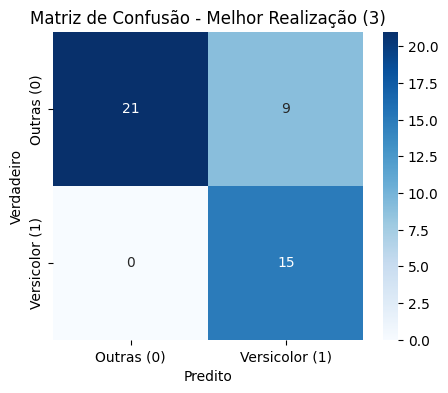

In [45]:
accuracies = []
conf_matrices = []

for run in range(20):
    X_train, X_test, y_train, y_test = train_test_split(X, y_binary_versicolor, test_size=0.3, stratify=y, random_state=run)

    model = Perceptronpb(n_features=X.shape[1], lr=0.01, epochs=50)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    conf_matrices.append(confusion_matrix(y_test, y_pred))

    print(f"Realização {run+1}: Acurácia = {acc:.4f}")

mean_acc = np.mean(accuracies)
std_acc = np.std(accuracies)
best_run = np.argmax(accuracies)

print("\n📊 Resultados gerais:")
print(f"Acurácia média: {mean_acc:.4f}")
print(f"Desvio padrão:  {std_acc:.4f}")
print(f"Melhor realização: {best_run+1} (Acurácia = {accuracies[best_run]:.4f})")

best_conf = conf_matrices[best_run]

plt.figure(figsize=(5, 4))
sns.heatmap(best_conf, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Outras (0)', 'Versicolor (1)'],
            yticklabels=['Outras (0)', 'Versicolor (1)'])
plt.title(f"Matriz de Confusão - Melhor Realização ({best_run+1})")
plt.xlabel("Predito")
plt.ylabel("Verdadeiro")
plt.show()



In [47]:
y_binary_virginica = np.where(y == 2, 1, 0)
print(np.unique(y_binary_versicolor, return_counts=True))

(array([0, 1]), array([100,  50]))


Realização 1: Acurácia = 0.9778
Realização 2: Acurácia = 1.0000
Realização 3: Acurácia = 0.9556
Realização 4: Acurácia = 0.9111
Realização 5: Acurácia = 0.9556
Realização 6: Acurácia = 0.9333
Realização 7: Acurácia = 0.9111
Realização 8: Acurácia = 0.9556
Realização 9: Acurácia = 0.8889
Realização 10: Acurácia = 0.9333
Realização 11: Acurácia = 0.9778
Realização 12: Acurácia = 0.9778
Realização 13: Acurácia = 0.9778
Realização 14: Acurácia = 1.0000
Realização 15: Acurácia = 0.9556
Realização 16: Acurácia = 0.9333
Realização 17: Acurácia = 0.9778
Realização 18: Acurácia = 0.8444
Realização 19: Acurácia = 0.9778
Realização 20: Acurácia = 0.9778

📊 Resultados gerais:
Acurácia média: 0.9511
Desvio padrão:  0.0382
Melhor realização: 2 (Acurácia = 1.0000)


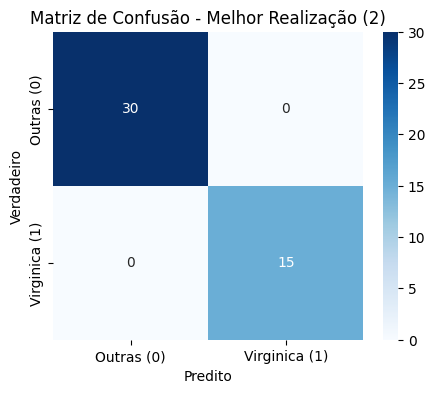

In [49]:
accuracies = []
conf_matrices = []

for run in range(20):
    X_train, X_test, y_train, y_test = train_test_split(X, y_binary_virginica, test_size=0.3, stratify=y, random_state=run)

    model = Perceptronnb(n_features=X.shape[1], lr=0.01, epochs=50)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    conf_matrices.append(confusion_matrix(y_test, y_pred))

    print(f"Realização {run+1}: Acurácia = {acc:.4f}")

mean_acc = np.mean(accuracies)
std_acc = np.std(accuracies)
best_run = np.argmax(accuracies)

print("\n📊 Resultados gerais:")
print(f"Acurácia média: {mean_acc:.4f}")
print(f"Desvio padrão:  {std_acc:.4f}")
print(f"Melhor realização: {best_run+1} (Acurácia = {accuracies[best_run]:.4f})")

best_conf = conf_matrices[best_run]

plt.figure(figsize=(5, 4))
sns.heatmap(best_conf, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Outras (0)', 'Virginica (1)'],
            yticklabels=['Outras (0)', 'Virginica (1)'])
plt.title(f"Matriz de Confusão - Melhor Realização ({best_run+1})")
plt.xlabel("Predito")
plt.ylabel("Verdadeiro")
plt.show()



Realização 1: Acurácia = 0.9556
Realização 2: Acurácia = 0.9778
Realização 3: Acurácia = 0.9778
Realização 4: Acurácia = 0.9333
Realização 5: Acurácia = 0.9556
Realização 6: Acurácia = 0.9333
Realização 7: Acurácia = 0.9111
Realização 8: Acurácia = 0.9778
Realização 9: Acurácia = 0.9111
Realização 10: Acurácia = 0.9778
Realização 11: Acurácia = 1.0000
Realização 12: Acurácia = 1.0000
Realização 13: Acurácia = 0.9778
Realização 14: Acurácia = 1.0000
Realização 15: Acurácia = 0.9556
Realização 16: Acurácia = 0.9556
Realização 17: Acurácia = 1.0000
Realização 18: Acurácia = 0.9556
Realização 19: Acurácia = 0.9778
Realização 20: Acurácia = 0.9778

📊 Resultados gerais:
Acurácia média: 0.9656
Desvio padrão:  0.0267
Melhor realização: 11 (Acurácia = 1.0000)


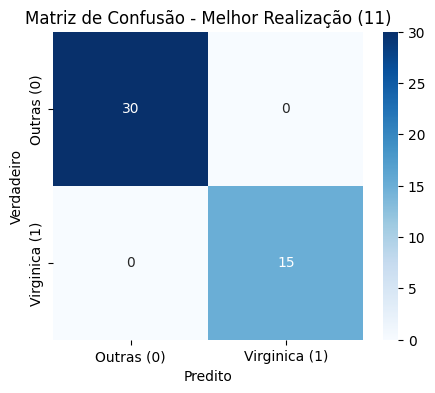

In [48]:
accuracies = []
conf_matrices = []

for run in range(20):
    X_train, X_test, y_train, y_test = train_test_split(X, y_binary_virginica, test_size=0.3, stratify=y, random_state=run)

    model = Perceptronpb(n_features=X.shape[1], lr=0.01, epochs=50)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    conf_matrices.append(confusion_matrix(y_test, y_pred))

    print(f"Realização {run+1}: Acurácia = {acc:.4f}")

mean_acc = np.mean(accuracies)
std_acc = np.std(accuracies)
best_run = np.argmax(accuracies)

print("\n📊 Resultados gerais:")
print(f"Acurácia média: {mean_acc:.4f}")
print(f"Desvio padrão:  {std_acc:.4f}")
print(f"Melhor realização: {best_run+1} (Acurácia = {accuracies[best_run]:.4f})")

best_conf = conf_matrices[best_run]

plt.figure(figsize=(5, 4))
sns.heatmap(best_conf, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Outras (0)', 'Virginica (1)'],
            yticklabels=['Outras (0)', 'Virginica (1)'])
plt.title(f"Matriz de Confusão - Melhor Realização ({best_run+1})")
plt.xlabel("Predito")
plt.ylabel("Verdadeiro")
plt.show()

